# Machine Learning Project

## Authors: Noel Chong, Mark Feng, Judy Kalenga, and Lucas Woolner

**Dataset Source: National Fire Database fire point data Dataset. Canadian Wildland Fire Information System. https://cwfis.cfs.nrcan.gc.ca/datamart/download/nfdbpnt.**

### National Fire Database fire point data Description

**Attributes for NFDB_point_20220901.txt dataset:**

Dataset Glossary

1. FID: Internal feature number.

2. SRC_AGENCY: Agency (province, territory, parks) from which the fire data has been obtained.

3. FIRE_ID: Agency fire ID.

4. FIRENAME: Agency firename.

5. LATITUDE: Latitude.

6. LONGITUDE: Longitude.

7. YEAR: Year of fire as provided by individual agencies.

8. MONTH: Month of fire as provided by individual agencies.

9. DAY: Day of fire as provided by individual agencies.

10. REP_DATE: Date associated with fire as reported by individual agency.

11. ATTK_DATE: *field description missing*

12. OUT_DATE: Date agency indicates fire is out or extinguished.

13. DECADE: *field description missing*

14. SIZE_HA: fire size (hectares) as reported by agency.

15. CAUSE: Cause of fire as reported by agency.

16. PROTZONE: Protection Zone as indicated by source agency. There is currently no official national standard that has been applied to this attribute.

17. FIRE_TYPE: Fire type as indicated by source agency. There is currently no official national standard that has been applied to this attribute.

18. MORE_INF: Additional attributes provided by agency.

19. CFS_REF_: *field description missing*

20. CFS_NOTE: Additional note added by CFS when compiling the NFDB.

21. CFS_NOTE: Additional note added by CFS when compiling the NFDB.

22. ACQ_DATE: Date that fire data was acquired from agency.

23. SRC_AGY2: *field description missing*

24. ECOZONE: Ecodistrict associated with fire point location. Data source The Ecological Framework of Canada: http://ecozones.ca/

25. ECOZ_REF: Ecozone reference id associated with fire point location. CFS divided Zone 5 and Zone 6 into west/east. Data source The Ecological Framework of Canada: http://ecozones.ca/.

26. ECOZ_NAME: Ecozone name associated with fire point location. CFS divided Zone 5 and Zone 6 into west/east. Data source The Ecological Framework of Canada: http://ecozones.ca/.

27. ECOZ_NOM: Ecozone name (FR) associated with fire point location. CFS divided Zone 5 and Zone 6 into west/east. Data source The Ecological Framework of Canada: http://ecozones.ca/.4. 


In [1]:
# import libraries 
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score,  precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

### Load the dataset

In [2]:
data_source = "C:/Users/Owner/Downloads/NFDB_point_txt/NFDB_point_20220901.txt"
raw_data = pd.read_csv(data_source, sep=',')
raw_data.head().transpose()  # peek at the first 5 rows

C:\Users\Owner\AppData\Local\Temp\ipykernel_22060\2498550749.py:2: DtypeWarning: Columns (10,11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(data_source, sep=',')


,0,1,2,3,4
FID,0,1,2,3,4
SRC_AGENCY,BC,BC,BC,BC,BC
FIRE_ID,1953-G00041,1950-R00028,1950-G00026,1951-R00097,1952-G00116
FIRENAME,,,,,
LATITUDE,59.963,59.318,59.876,59.76,59.434
LONGITUDE,-128.172,-132.172,-131.922,-132.808,-126.172
YEAR,1953,1950,1950,1951,1952
MONTH,5,6,6,7,6
DAY,26,22,4,15,12
REP_DATE,1953-05-26 00:00:00,1950-06-22 00:00:00,1950-06-04 00:00:00,1951-07-15 00:00:00,1952-06-12 00:00:00


### Feature selection

In [3]:
data = raw_data[['YEAR','MONTH', 'DAY', 'LATITUDE','LONGITUDE']]
data

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
0,1953,5,26,59.96300,-128.172000
1,1950,6,22,59.31800,-132.172000
2,1950,6,4,59.87600,-131.922000
3,1951,7,15,59.76000,-132.808000
4,1952,6,12,59.43400,-126.172000
...,...,...,...,...,...
423826,2021,7,8,59.61015,-113.985117
423827,2021,3,4,49.11120,-113.836000
423828,2021,3,17,49.11220,-113.840500
423829,2021,9,18,49.04630,-113.916300


In [4]:
# since dataset is quite large at this point, narrowing the data to within the last 25 years (2001-2021, instead of 1930-2021)
data = data[data['YEAR'] > 2000]

In [5]:
data

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
105315,2005,6,20,55.80000,-124.816700
109890,2001,5,6,59.83920,-127.450000
109891,2001,5,6,59.80420,-127.478000
109892,2001,5,6,59.92270,-128.514300
109899,2003,7,1,59.24480,-131.916800
...,...,...,...,...,...
423826,2021,7,8,59.61015,-113.985117
423827,2021,3,4,49.11120,-113.836000
423828,2021,3,17,49.11220,-113.840500
423829,2021,9,18,49.04630,-113.916300


In [6]:
data.info() # quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values >> conclusion: all features are numerical 

<class 'pandas.core.frame.DataFrame'>
Index: 138701 entries, 105315 to 423830
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       138701 non-null  int64  
 1   MONTH      138701 non-null  int64  
 2   DAY        138701 non-null  int64  
 3   LATITUDE   138701 non-null  float64
 4   LONGITUDE  138701 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 6.3 MB


In [7]:
data.describe() # summary of the numerical attributes

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
count,138701.000000,138701.000000,138701.000000,138701.000000,138701.000000
mean,2010.198225,6.405275,15.173914,52.006245,-102.256983
std,6.007177,1.824690,9.094760,4.706613,20.695305
min,2001.000000,0.000000,0.000000,0.000000,-166.044000
25%,2005.000000,5.000000,7.000000,49.120800,-118.509500
50%,2010.000000,7.000000,15.000000,51.396000,-111.227483
75%,2015.000000,8.000000,23.000000,55.116944,-85.692900
max,2021.000000,12.000000,31.000000,69.602500,116.188000


In [8]:
data[data['DAY'] == 0] # should get rid of these samples since the date and month are not valid

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
214149,2002,0,0,53.1668,-102.8540
214633,2002,0,0,52.3867,-102.4170
214700,2002,0,0,49.9825,-109.4280
218288,2002,0,0,53.9782,-105.8740
229675,2002,0,0,49.9752,-109.5790
...,...,...,...,...,...
423443,2008,0,0,45.2453,-81.5261
423448,2009,0,0,45.9047,-59.9878
423532,2009,0,0,42.0000,-72.0000
423534,2008,0,0,48.7835,-123.0010


In [9]:
valid_data = data[data['DAY'] != 0] # this data excludes samples with invalid date

In [10]:
valid_data.describe()

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
count,135933.000000,135933.000000,135933.000000,135933.000000,135933.000000
mean,2010.347576,6.535705,15.482900,51.971807,-102.350724
std,5.967695,1.595253,8.922721,4.735857,20.860087
min,2001.000000,1.000000,1.000000,0.000000,-166.044000
25%,2005.000000,5.000000,8.000000,49.090100,-118.617700
50%,2010.000000,7.000000,15.000000,51.287100,-111.849957
75%,2015.000000,8.000000,23.000000,55.106683,-84.591600
max,2021.000000,12.000000,31.000000,69.602500,116.188000


In [11]:
valid_data[valid_data['LATITUDE'] == 0] # I think need to get rid of these samples too

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
423480,2018,1,14,0.0,0.0
423481,2018,3,27,0.0,0.0
423482,2018,4,17,0.0,0.0
423483,2018,4,20,0.0,0.0
423484,2018,5,15,0.0,0.0
...,...,...,...,...,...
423643,2020,7,11,0.0,0.0
423683,2020,8,12,0.0,0.0
423695,2020,8,1,0.0,0.0
423702,2020,5,14,0.0,0.0


In [12]:
valid_data[valid_data['LONGITUDE'] == 0]

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
423480,2018,1,14,0.0,0.0
423481,2018,3,27,0.0,0.0
423482,2018,4,17,0.0,0.0
423483,2018,4,20,0.0,0.0
423484,2018,5,15,0.0,0.0
...,...,...,...,...,...
423643,2020,7,11,0.0,0.0
423683,2020,8,12,0.0,0.0
423695,2020,8,1,0.0,0.0
423702,2020,5,14,0.0,0.0


In [13]:
valid_data = valid_data[valid_data['LATITUDE'] != 0] # this data excludes samples with invalid location

In [14]:
valid_data.describe()

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
count,135787.000000,135787.000000,135787.000000,135787.000000,135787.000000
mean,2010.341977,6.535685,15.484045,52.027688,-102.460773
std,5.967979,1.594993,8.923117,4.420983,20.599401
min,2001.000000,1.000000,1.000000,41.915900,-166.044000
25%,2005.000000,5.000000,8.000000,49.094900,-118.623400
50%,2010.000000,7.000000,15.000000,51.295409,-111.879620
75%,2015.000000,8.000000,23.000000,55.109750,-84.733900
max,2021.000000,12.000000,31.000000,69.602500,116.188000


In [15]:
# raw data used to train the model 
valid_data = valid_data[['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']]

**Note: final features selected for model training include month, day, latitude, and longitude.**

In [16]:
# check for duplicate rows
valid_data.duplicated().sum()

481

In [17]:
# delete duplicates 
unique_data = valid_data.drop_duplicates(inplace=False)
unique_data

,MONTH,DAY,LATITUDE,LONGITUDE
105315,6,20,55.80000,-124.816700
109890,5,6,59.83920,-127.450000
109891,5,6,59.80420,-127.478000
109892,5,6,59.92270,-128.514300
109899,7,1,59.24480,-131.916800
...,...,...,...,...
423826,7,8,59.61015,-113.985117
423827,3,4,49.11120,-113.836000
423828,3,17,49.11220,-113.840500
423829,9,18,49.04630,-113.916300


In [18]:
# confirming there are no duplicates
unique_data.duplicated().sum()

0

In [19]:
# the number of missing values in each column
unique_data.isna().sum()

MONTH        0
DAY          0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [20]:
# number of instances if sampled 5% of the data
len(unique_data) * 0.05

6765.3

In [21]:
# randomly sample 5% of the data
data_sample = unique_data.sample(n=6765, random_state=42) 
data_sample

,MONTH,DAY,LATITUDE,LONGITUDE
140646,5,13,55.125400,-127.780800
194732,10,23,56.586667,-111.319883
210594,8,30,51.404567,-115.057733
216693,8,28,56.509800,-109.412000
407027,7,27,60.583300,-108.583300
...,...,...,...,...
148322,7,2,51.524900,-117.308800
184690,6,7,55.915000,-115.652667
371433,8,19,47.730500,-70.276000
132484,7,23,49.973600,-116.182800


In [22]:
data_sample.describe()

,MONTH,DAY,LATITUDE,LONGITUDE
count,6765.000000,6765.000000,6765.000000,6765.000000
mean,6.511899,15.568367,52.065754,-102.390293
std,1.594931,8.970644,4.380758,20.532204
min,1.000000,1.000000,41.931900,-141.000000
25%,5.000000,8.000000,49.133300,-118.515600
50%,7.000000,15.000000,51.412800,-111.662500
75%,8.000000,23.000000,55.072783,-84.803706
max,12.000000,31.000000,69.602500,-52.680000


### Data synthesis (no fire instances)

**Note: dataset prior to processing only contained fire instances**

In [23]:
sample_latitudes = data_sample['LATITUDE']
sample_longitudes = data_sample['LONGITUDE']

In [24]:
# define ranges
months_range = range(1, 13)
days_range = range(1, 32)
latitude_range = sample_latitudes.unique() # using values present in the data already (from data_sample)
longitude_range = sample_longitudes.unique()

In [25]:
longitude_range

array([-127.7808  , -111.319883, -115.057733, ...,  -70.276   ,
       -116.1828  ,  -79.5728  ])

In [26]:
len(latitude_range) * 0.05

331.25

In [27]:
# randomly sample 5% of latitudes from the data (sampling with replacement to increase diversity)
latitude_range = np.random.choice(latitude_range, size=331)
len(latitude_range)

331

In [28]:
len(longitude_range) * 0.05

334.40000000000003

In [29]:
# randomly sample 5% of longitudes from the data (sampling with replacement)
longitude_range = np.random.choice(longitude_range, size=334)
len(longitude_range)

334

In [30]:
# generate possible combinations of months, days, latitudes, and longitudes (sample space)
possible_combinations = np.array(list(itertools.product(months_range, days_range, latitude_range, longitude_range)))
possible_combinations

array([[   1.      ,    1.      ,   49.9424  , -116.8404  ],
       [   1.      ,    1.      ,   49.9424  ,  -77.73643 ],
       [   1.      ,    1.      ,   49.9424  ,  -84.3375  ],
       ...,
       [  12.      ,   31.      ,   53.130533, -102.929   ],
       [  12.      ,   31.      ,   53.130533,  -82.4445  ],
       [  12.      ,   31.      ,   53.130533, -119.5156  ]])

In [31]:
len(possible_combinations)

41126088

In [32]:
# generate dataframe of possible combinations 
possible_df = pd.DataFrame(possible_combinations, columns=['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE'])
possible_df

,MONTH,DAY,LATITUDE,LONGITUDE
0,1.0,1.0,49.942400,-116.840400
1,1.0,1.0,49.942400,-77.736430
2,1.0,1.0,49.942400,-84.337500
3,1.0,1.0,49.942400,-64.991570
4,1.0,1.0,49.942400,-124.161300
...,...,...,...,...
41126083,12.0,31.0,53.130533,-80.817100
41126084,12.0,31.0,53.130533,-115.105133
41126085,12.0,31.0,53.130533,-102.929000
41126086,12.0,31.0,53.130533,-82.444500


In [33]:
# shuffle the data 
possible_df = possible_df.sample(n=41126088, random_state=42)
possible_df

,MONTH,DAY,LATITUDE,LONGITUDE
10406386,4.0,2.0,56.162500,-108.850000
28872660,9.0,14.0,52.936862,-118.961583
11259833,4.0,9.0,49.849500,-118.474667
18735435,6.0,15.0,48.214330,-114.986400
6702225,2.0,30.0,60.201667,-119.798200
...,...,...,...,...
26301898,8.0,21.0,50.469500,-126.746300
26735830,8.0,25.0,49.577500,-123.960100
35788921,11.0,14.0,57.152800,-115.224700
13315092,4.0,28.0,51.401000,-117.593567


In [34]:
possible_df.describe()

,MONTH,DAY,LATITUDE,LONGITUDE
count,4.112609e+07,4.112609e+07,4.112609e+07,4.112609e+07
mean,6.500000e+00,1.600000e+01,5.263801e+01,-1.036967e+02
std,3.452053e+00,8.944272e+00,4.315461e+00,1.998048e+01
min,1.000000e+00,1.000000e+00,4.383828e+01,-1.397543e+02
25%,3.750000e+00,8.000000e+00,4.965707e+01,-1.191416e+02
50%,6.500000e+00,1.600000e+01,5.187890e+01,-1.135671e+02
75%,9.250000e+00,2.400000e+01,5.562500e+01,-8.393510e+01
max,1.200000e+01,3.100000e+01,6.445000e+01,-5.390000e+01


In [35]:
possible_df.duplicated().sum()

1592904

In [36]:
# get rid of duplicates in possible combinations 
possible_df = possible_df.drop_duplicates(inplace=False)
possible_df.describe()

,MONTH,DAY,LATITUDE,LONGITUDE
count,3.953318e+07,3.953318e+07,3.953318e+07,3.953318e+07
mean,6.500000e+00,1.600000e+01,5.264129e+01,-1.035415e+02
std,3.452053e+00,8.944272e+00,4.298353e+00,2.003853e+01
min,1.000000e+00,1.000000e+00,4.383828e+01,-1.397543e+02
25%,3.750000e+00,8.000000e+00,4.967434e+01,-1.190066e+02
50%,6.500000e+00,1.600000e+01,5.185620e+01,-1.134388e+02
75%,9.250000e+00,2.400000e+01,5.556576e+01,-8.370257e+01
max,1.200000e+01,3.100000e+01,6.445000e+01,-5.390000e+01


In [37]:
possible_df.duplicated().sum()

0

In [38]:
len(raw_data[['MONTH', 'DAY', 'LATITUDE','LONGITUDE']])

423831

In [39]:
len(possible_df)

39533184

In [40]:
# the idea here: result_merge contains the rows from possible_df that are not present in rawData -- essentially performing a set difference operation, keeping only the rows that exist in the left DataFrame (possible_df) but not in the right DataFrame (raw_data)
result_merge = possible_df.merge(raw_data[['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']], how='outer', indicator=True).loc[lambda x: x['_merge'] == 'left_only'].drop(columns=['_merge'])
result_merge.duplicated().sum()

0

In [41]:
result_merge

,MONTH,DAY,LATITUDE,LONGITUDE
0,4.0,2.0,56.162500,-108.850000
1,9.0,14.0,52.936862,-118.961583
2,4.0,9.0,49.849500,-118.474667
3,6.0,15.0,48.214330,-114.986400
4,2.0,30.0,60.201667,-119.798200
...,...,...,...,...
39533180,8.0,21.0,50.469500,-126.746300
39533181,8.0,25.0,49.577500,-123.960100
39533182,11.0,14.0,57.152800,-115.224700
39533183,4.0,28.0,51.401000,-117.593567


In [42]:
# randomly sample same amount as data_sample for no fire instances 
no_fire = result_merge.sample(n=6765, random_state=42) 
no_fire

,MONTH,DAY,LATITUDE,LONGITUDE
30735191,12.0,30.0,49.393017,-93.845600
25493058,12.0,10.0,49.535900,-118.533300
6147443,12.0,27.0,57.350000,-111.313333
38814369,8.0,22.0,62.534300,-113.753433
17493490,7.0,20.0,46.971700,-110.875500
...,...,...,...,...
189992,1.0,16.0,50.469500,-89.651200
32920193,5.0,17.0,50.224300,-112.238421
590030,6.0,14.0,63.666600,-109.083467
22547765,9.0,25.0,52.223700,-75.874230


In [43]:
no_fire.describe()

,MONTH,DAY,LATITUDE,LONGITUDE
count,6765.000000,6765.000000,6765.000000,6765.000000
mean,6.488840,16.016408,52.600227,-103.522316
std,3.432512,8.884860,4.318729,19.978072
min,1.000000,1.000000,43.838285,-139.754267
25%,4.000000,8.000000,49.657067,-119.141600
50%,6.000000,16.000000,51.831300,-113.402950
75%,9.000000,24.000000,55.464500,-83.005000
max,12.000000,31.000000,64.450000,-53.900000


In [44]:
# add labels
data_sample.insert(4, "FIRE", 1)
data_sample

,MONTH,DAY,LATITUDE,LONGITUDE,FIRE
140646,5,13,55.125400,-127.780800,1
194732,10,23,56.586667,-111.319883,1
210594,8,30,51.404567,-115.057733,1
216693,8,28,56.509800,-109.412000,1
407027,7,27,60.583300,-108.583300,1
...,...,...,...,...,...
148322,7,2,51.524900,-117.308800,1
184690,6,7,55.915000,-115.652667,1
371433,8,19,47.730500,-70.276000,1
132484,7,23,49.973600,-116.182800,1


In [45]:
# add labels
no_fire.insert(4, "FIRE", 0)
no_fire

,MONTH,DAY,LATITUDE,LONGITUDE,FIRE
30735191,12.0,30.0,49.393017,-93.845600,0
25493058,12.0,10.0,49.535900,-118.533300,0
6147443,12.0,27.0,57.350000,-111.313333,0
38814369,8.0,22.0,62.534300,-113.753433,0
17493490,7.0,20.0,46.971700,-110.875500,0
...,...,...,...,...,...
189992,1.0,16.0,50.469500,-89.651200,0
32920193,5.0,17.0,50.224300,-112.238421,0
590030,6.0,14.0,63.666600,-109.083467,0
22547765,9.0,25.0,52.223700,-75.874230,0


In [46]:
# dataset including both fire and no fire instances
dataset = pd.concat([data_sample, no_fire], keys=['sample', 'random'])
dataset

MONTH   DAY   LATITUDE   LONGITUDE  FIRE
sample 140646      5.0  13.0  55.125400 -127.780800     1
       194732     10.0  23.0  56.586667 -111.319883     1
       210594      8.0  30.0  51.404567 -115.057733     1
       216693      8.0  28.0  56.509800 -109.412000     1
       407027      7.0  27.0  60.583300 -108.583300     1
...                ...   ...        ...         ...   ...
random 189992      1.0  16.0  50.469500  -89.651200     0
       32920193    5.0  17.0  50.224300 -112.238421     0
       590030      6.0  14.0  63.666600 -109.083467     0
       22547765    9.0  25.0  52.223700  -75.874230     0
       32485369    1.0  28.0  49.939100 -114.468683     0

[13530 rows x 5 columns]

In [47]:
# checking for duplicates one more time
dataset.duplicated(keep='first', subset=['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']).sum()

0

### Feature scaling

In [48]:
months = dataset['MONTH']
days = dataset['DAY']
latitudes = dataset['LATITUDE']
longitudes = dataset['LONGITUDE']

# feature scaling using standardization
scaler = StandardScaler()
standardized_month = scaler.fit_transform(months.values.reshape(-1, 1))
standardized_days = scaler.fit_transform(days.values.reshape(-1, 1))
standardized_latitude = scaler.fit_transform(latitudes.values.reshape(-1, 1))
standardized_longitude = scaler.fit_transform(longitudes.values.reshape(-1, 1))
standardized_info = [standardized_month, standardized_days, standardized_latitude, standardized_longitude]
standardized_data = pd.DataFrame(np.array(standardized_info).reshape(4, -1))
standardized_data.index =['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']
standardized_data.duplicated().sum()

0

In [49]:
dataset['FIRE'].values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
standardized_data

,0,1,2,3,4,5,6,7,8,9,...,13520,13521,13522,13523,13524,13525,13526,13527,13528,13529
MONTH,-0.560634,1.307686,0.560358,0.560358,0.186694,-0.186970,0.934022,-1.307963,0.186694,0.560358,...,-1.307963,1.307686,-0.186970,2.055015,0.560358,-2.055291,-0.560634,-0.186970,0.934022,-2.055291
DAY,-0.312697,0.807123,1.590997,1.367033,1.255051,-1.544499,-1.432517,-1.096571,1.590997,-0.424679,...,1.479015,-0.984589,-0.984589,0.247213,-1.656481,0.023249,0.135231,-0.200715,1.031087,1.367033
LATITUDE,0.640794,0.976121,-0.213052,0.958482,1.893257,1.874141,-1.293275,0.982279,-0.728999,-0.936035,...,-0.632322,0.540356,-0.548586,-1.187610,-1.614968,-0.427628,-0.483896,2.600803,-0.025080,-0.549343
LONGITUDE,-1.225088,-0.412742,-0.597205,-0.318588,-0.277692,-0.431501,1.182207,-0.576200,0.479331,0.596059,...,-0.916350,-0.596964,-1.101145,-1.046466,0.389119,0.656606,-0.458072,-0.302375,1.336499,-0.568135


In [51]:
# add labels again
standardized_data.loc["FIRE"] = dataset['FIRE'].values
standardized_data

,0,1,2,3,4,5,6,7,8,9,...,13520,13521,13522,13523,13524,13525,13526,13527,13528,13529
MONTH,-0.560634,1.307686,0.560358,0.560358,0.186694,-0.186970,0.934022,-1.307963,0.186694,0.560358,...,-1.307963,1.307686,-0.186970,2.055015,0.560358,-2.055291,-0.560634,-0.186970,0.934022,-2.055291
DAY,-0.312697,0.807123,1.590997,1.367033,1.255051,-1.544499,-1.432517,-1.096571,1.590997,-0.424679,...,1.479015,-0.984589,-0.984589,0.247213,-1.656481,0.023249,0.135231,-0.200715,1.031087,1.367033
LATITUDE,0.640794,0.976121,-0.213052,0.958482,1.893257,1.874141,-1.293275,0.982279,-0.728999,-0.936035,...,-0.632322,0.540356,-0.548586,-1.187610,-1.614968,-0.427628,-0.483896,2.600803,-0.025080,-0.549343
LONGITUDE,-1.225088,-0.412742,-0.597205,-0.318588,-0.277692,-0.431501,1.182207,-0.576200,0.479331,0.596059,...,-0.916350,-0.596964,-1.101145,-1.046466,0.389119,0.656606,-0.458072,-0.302375,1.336499,-0.568135
FIRE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
# shuffle data before partioning 
standardized_data = standardized_data.transpose() # needs to be a design matrix shape (features as columns) in order to do the randomly sampling
standardized_data = standardized_data.sample(n=13530, random_state=42)
standardized_data # prepared data used for model training

,MONTH,DAY,LATITUDE,LONGITUDE,FIRE
2117,-0.934298,0.583159,-0.464482,-0.627174,1.0
7369,0.934022,1.255051,-0.654512,1.177362,0.0
5225,0.186694,0.471177,-1.016625,1.814349,1.0
399,-0.186970,-0.760625,2.187760,-0.980931,1.0
4878,0.186694,1.479015,3.084671,-1.196187,1.0
...,...,...,...,...,...
5191,-0.560634,-0.872607,-0.708875,-0.933943,1.0
13418,2.055015,0.807123,-0.942249,-0.561604,0.0
5390,0.186694,-1.432517,-0.377212,-0.776215,1.0
860,-1.307963,1.702979,-1.941722,1.825618,1.0


In [53]:
standardized_data.shape

(13530, 5)

### Partition the data

In [54]:
# split the data into 60% training set, 20% dev set, and 20% testing set
training_set = standardized_data[:8118]
dev_set = standardized_data[8118:10824]
test_set = standardized_data[10824:]

X_train = np.array(training_set[['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']])
y_train = training_set['FIRE'].values
X_dev = np.array(dev_set[['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']])
y_dev = dev_set['FIRE'].values
X_test = np.array(test_set[['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']])
y_test = test_set['FIRE'].values

### Model training and evaluation

In [55]:
# logistic regression 
lr_model = LogisticRegression()

# use GridSearchCV to find the optimal set of hyperparameters for the logistic model
lr_parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [50, 100, 150, 200, 250],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

lr_gs = GridSearchCV(lr_model, lr_parameters, cv=5)

# train model on training set 
lr_gs.fit(X_train, y_train)

# optimal model
bestLR = lr_gs.best_estimator_

# optimal hyperparameters
print("Best Hyperparameters:", bestLR.get_params(), "\n")

# make predictions on the dev set
y_predict_bestLR = bestLR.predict(X_dev)

# evaluate
print('Training Accuracy: ', bestLR.score(X_train, y_train))
print('Test Accuracy: ', accuracy_score(y_dev, y_predict_bestLR))
print('Precision: ', precision_score(y_dev, y_predict_bestLR))
print('Recall: ', recall_score(y_dev, y_predict_bestLR))
print("F1-score: ", f1_score(y_dev, y_predict_bestLR))

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserW

Best Hyperparameters: {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l1', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Training Accuracy:  0.5248829761024884
Test Accuracy:  0.532520325203252
Precision:  0.5272067714631197
Recall:  0.6435424354243543
F1-score:  0.5795945496842805


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan 0.49581182        nan 0.50086207 0.52032551 0.51970899
 0.52032551 0.52032551        nan        nan        nan        nan
 0.52488216        nan 0.52488216 0.52488216        nan 0.49581182
        nan 0.50086207 0.52032551 0.51970899 0.52032551 0.52044866
        nan        nan        nan        nan 0.52488216        nan
 0.52488216 0.52488216        nan 0.49581182        nan 0.49913793
 0.52032551 0.51970899 0.52020236 0.52032551        nan        nan
        nan        nan 0.52488216        nan 0.52488216 0.52488216
        nan 0.49581182        nan 0.5007399  0.52032551 0.51970899
 0.52044866 0.52032551        nan        nan        nan        nan
 0.52488216        nan 0.52488216 0.52488216        nan 0.49581182
        nan 0.50246404 0

In [56]:
# neural network 
nn_model = MLPClassifier(activation= 'logistic', solver='lbfgs', alpha=0.1, random_state=1, max_iter=2000) # define model
nn_model.fit(X_train, y_train) # train

y_predict_nn = nn_model.predict(X_dev) # test

# evalutate
print('Training Accuracy: ', nn_model.score(X_train, y_train))
print('Test Accuracy: ', accuracy_score(y_dev, y_predict_nn))
print('Precision: ', precision_score(y_dev, y_predict_nn))
print('Recall: ', recall_score(y_dev, y_predict_nn))
print("F1-score: ", f1_score(y_dev, y_predict_nn))

Training Accuracy:  0.8527962552352796
Test Accuracy:  0.8300073909830007
Precision:  0.800941492938803
Recall:  0.8789667896678967
F1-score:  0.8381421534130894


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [57]:
# classification report 
print(classification_report(y_dev, y_predict_nn))

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      1351
         1.0       0.80      0.88      0.84      1355

    accuracy                           0.83      2706
   macro avg       0.83      0.83      0.83      2706
weighted avg       0.83      0.83      0.83      2706



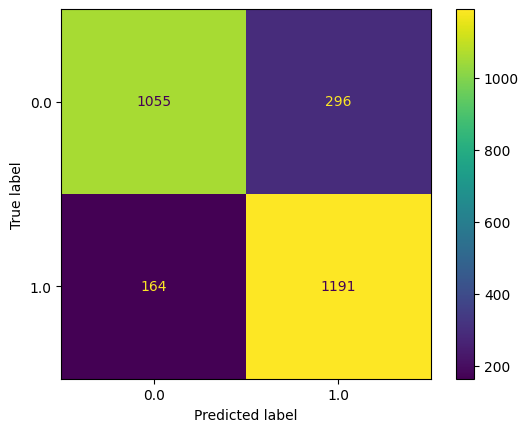

In [58]:
# confusion matrix 
ConfusionMatrixDisplay.from_predictions(y_dev, y_predict_nn)

In [59]:
# decision tree 
dt_model = tree.DecisionTreeClassifier()

dt_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'] #Could add more params but I don't understand them oof
}

# model
dt_gs = GridSearchCV(dt_model, dt_parameters, cv=5)

# training
dt_gs.fit(X_train, y_train)

bestDT = dt_gs.best_estimator_

print("Best Hyperparameters:", bestDT.get_params(), "\n")

# test
y_predict_bestDT = bestDT.predict(X_dev)

# evaluate
print('Training Accuracy: ', bestDT.score(X_train, y_train))
print('Test Accuracy: ', accuracy_score(y_dev, y_predict_bestDT))
print('Precision: ', precision_score(y_dev, y_predict_bestDT))
print('Recall: ', recall_score(y_dev, y_predict_bestDT))
print("F1-score: ", f1_score(y_dev, y_predict_bestDT))

Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'} 

Training Accuracy:  1.0
Test Accuracy:  0.7926829268292683
Precision:  0.7936390532544378
Recall:  0.7918819188191882
F1-score:  0.7927595123753233


In [60]:
# k-nearest neighbours 
knn_model = KNeighborsClassifier(n_neighbors=5) # define model
knn_parameters = {
    'n_neighbors': [5, 7, 11, 13, 17],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] #Could add more params but I don't understand them oof
}
knn_gs = GridSearchCV(knn_model, knn_parameters, cv=5)

# training
knn_gs.fit(X_train, y_train)

bestKNN = knn_gs.best_estimator_

print("Best Hyperparameters:", bestKNN.get_params(), "\n")

# test
y_predict_bestKNN = bestKNN.predict(X_dev)

# evaluate
print('Training Accuracy: ', bestDT.score(X_train, y_train))
print('Test Accuracy: ', accuracy_score(y_dev, y_predict_bestKNN))
print('Precision: ', precision_score(y_dev, y_predict_bestKNN))
print('Recall: ', recall_score(y_dev, y_predict_bestKNN))
print("F1-score: ", f1_score(y_dev, y_predict_bestKNN))

Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'} 

Training Accuracy:  1.0
Test Accuracy:  0.8185513673318552
Precision:  0.7744599745870394
Recall:  0.8996309963099631
F1-score:  0.8323659952202117


In [61]:
print(classification_report(y_dev, y_predict_bestKNN))

              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80      1351
         1.0       0.77      0.90      0.83      1355

    accuracy                           0.82      2706
   macro avg       0.83      0.82      0.82      2706
weighted avg       0.83      0.82      0.82      2706



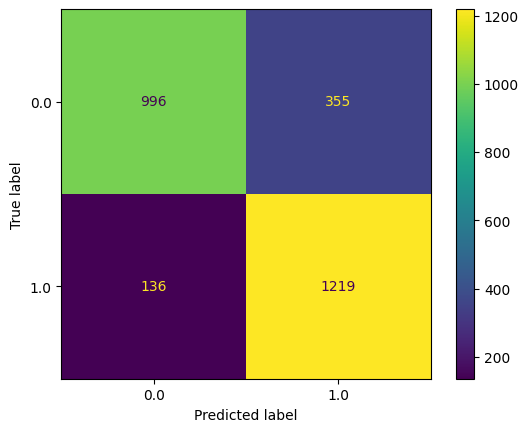

In [62]:
# confusion matrix 
ConfusionMatrixDisplay.from_predictions(y_dev, y_predict_bestKNN)

### Model selection and evaluation

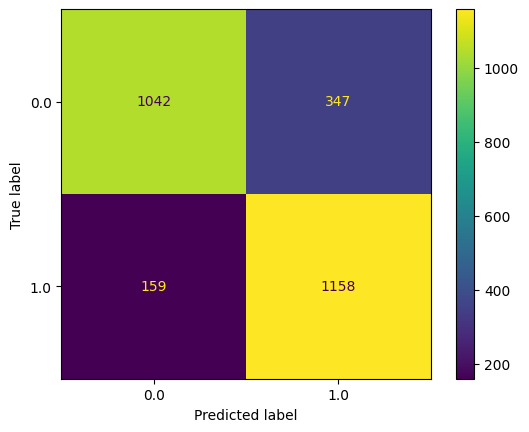

In [63]:
# test model against test set
y_predict = nn_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)

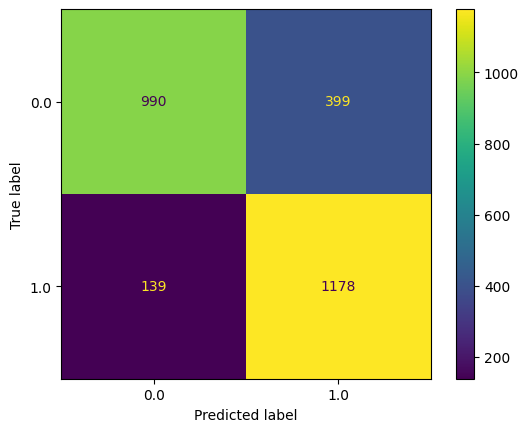

In [64]:
# test model against test set
y_predict = bestKNN.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)